In [1]:
import numpy as np
from sklearn.utils.extmath import randomized_svd as rsvd
from matplotlib import pyplot as plt
import time

## SVD

In [2]:
# Hilbert matrix
def A(i, j):
    return 1.0/(i + j + 1)

In [3]:
M = 1500; N = 1024 # number of rows and columns
x = np.linspace(1, N, N) # grid for drawings
r = 20 # target rank
# fill the matrix Ma
Ma = np.fromfunction(A, [M, N])

In [4]:
# Estimate the time, does not save the data
start = time.time()
U, s, V = np.linalg.svd(Ma)
# Truncation of SVD
Ut = U[:, :r] # m \times r
st = s[:r] # r
Vt = V[:r, :] # r \times n
np.linalg.norm(Ma - Ut @ np.diag(st) @ Vt)
print("Classical ", time.time() - start, " sec")
start = time.time()
Ur, sr, Vr = rsvd(Ma, n_components = r, random_state = np.random.randint(1))
print("Randomized ", time.time() - start, " sec")

Classical  0.2247931957244873  sec
Randomized  0.40902066230773926  sec


Relative error of sigmas= 7.921972539071859e-16
Classical relative approximation error =  3.322653783517555e-11
Randomized straight-forward error =  3.3226596858840554e-11
Initial storage 1536000  memory cells 
 Compressed storage  50500  memory cells 


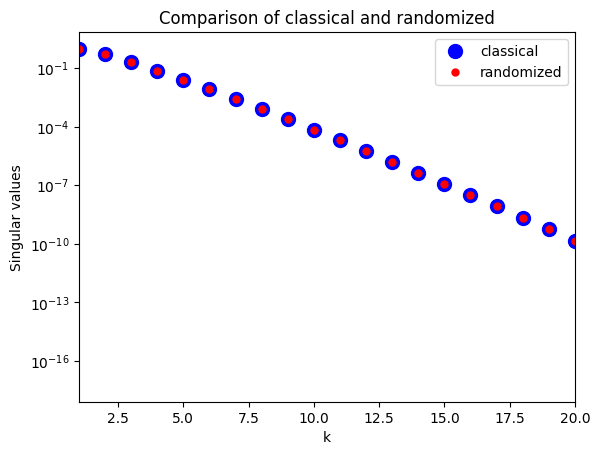

In [5]:
# Check the error for singular values
plt.title("Comparison of classical and randomized")
plt.plot(x, s / s[0], 'bo', markersize = 10, label = 'classical')
plt.plot(x[:r], sr/s[0], 'ro', markersize = 5, label = 'randomized')
plt.ylabel('Singular values')
plt.xlabel('k')
plt.xlim(1, r)
plt.legend()
plt.yscale('log')
print('Relative error of sigmas=', np.linalg.norm(s[:r] - sr) / np.linalg.norm(s[:r]))
print('Classical relative approximation error = ', np.linalg.norm(s[r:]) / np.linalg.norm(s))
print('Randomized straight-forward error = ', np.linalg.norm(Ma - (Ur @ np.diag(sr) @ Vr)) / np.linalg.norm(s))
print("Initial storage", M * N, " memory cells ")
print(" Compressed storage ", (1 + M + N) * r, " memory cells ")

In [6]:
"""
Maybe some time later

eps = 1e-6
def cross_method(m, n, A):
    I = list(range(m))
    J = list(range(m))
    r = 0
    
    def norm_update(U, V, u, v):
        
    
    while true:
        r += 1
        i = 
        
        if abs((A - U @ V)[i, j]) * np.sqrt( (m - r) * (n - r) ) < eps * 
        
        I.pop(i)
        J.pop(j)
        
        
    return U, V, r
    
"""

'\nMaybe some time later\n\neps = 1e-6\ndef cross_method(m, n, A):\n    I = list(range(m))\n    J = list(range(m))\n    r = 0\n    \n    def norm_update(U, V, u, v):\n        \n    \n    while true:\n        r += 1\n        i = \n        \n        if abs((A - U @ V)[i, j]) * np.sqrt( (m - r) * (n - r) ) < eps * \n        \n        I.pop(i)\n        J.pop(j)\n        \n        \n    return U, V, r\n    \n'

## Tensor decomposition

### CP format

In [7]:
nsteps = 10

def ALS(A, R):
    """CP decomposition ALS 
       for Alternative least squares for order three tensor
       (requires know absolute rank R)
    """
    
    U = np.random.rand(R, A.shape[0])
    V = np.random.rand(R, A.shape[1])
    W = np.random.rand(R, A.shape[2])
    
        

In [11]:
U = np.random.rand(10, 5)
V = np.random.rand(13, 5)

np.einsum('ja,ka->jka', U, V).shape

(10, 13, 5)

In [82]:
import numpy as np


def ALS(R, rank, num_iter = 20, lam = 0.01):
    """CP decomposition ALS 
       for Alternative least squares for order two tensor (matrix) 
       (requires know absolute rank rank)
    """

    global lr_curve

    lr_curve = []
    
    n = R.shape[0]
    m = R.shape[1]
    
    U = np.random.rand(rank, n)
    V = np.random.rand(rank, m)


    for iter in range(num_iter):
        A = np.zeros((rank, rank))
        B = np.zeros(rank)
        for u in range(n):
            for i in range(m):
                B += R[u, i]*V[:, i]
                A += V[:, i][:, None]*V[:, i][None, :]
    
            A += lam*np.eye(rank, rank)
            U[:, u] = np.linalg.solve(A, B)
    
        A = np.zeros((rank, rank))
        B = np.zeros(rank)
        for i in range(m):
            for u in range(n):
                B += R[u, i]*U[:, u]
                A += U[:, i][:, None]*U[:, i][None, :]
    
            A += lam*np.eye(rank, rank)
            V[:, i] = np.linalg.solve(A, B)

        lr_curve.append(((R - U.T @ V)**2).sum())
    
    return U, V
        

In [83]:
# Sample data
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

# Run ALS
U, V = ALS(R, rank=10, num_iter=100, lam=0.1)
print(U.shape, V.shape)
predicted_R = U.T @ V
print("Predicted Ratings Matrix:")
print(((predicted_R - R)**2).sum())

(10, 5) (10, 4)
Predicted Ratings Matrix:
654.7066327139206


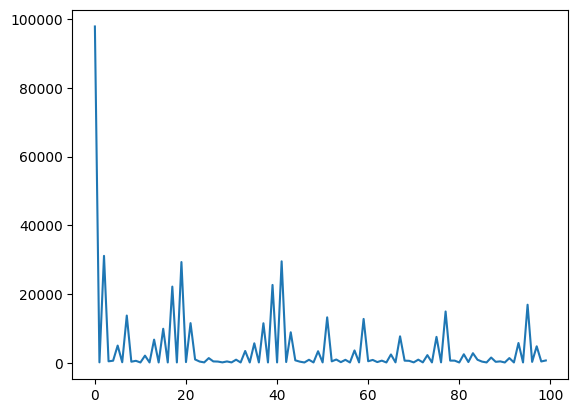

In [84]:
plt.plot(lr_curve)